In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm
import sys, os, glob

# This is sourse code for Koppen

In [2]:
koppenDict = {
    "Af": 1,"Am": 2,"Aw": 3,
    "BWh": 4, "BWk": 5, "BSh": 6, "BSk": 7,
    "Csa": 8, "Csb": 9, "Csc": 10, "Cwa": 11, "Cwb": 12, "Cwc": 13, "Cfa": 14, "Cfb": 15, "Cfc": 16,
    "Dsa": 17, "Dsb": 18, "Dsc": 19, "Dsd": 20, "Dwa": 21, "Dwb": 22, "Dwc": 23, "Dwd": 24, "Dfa": 25, "Dfb": 26,
    "Dfc": 27, "Dfd": 28,
    "ET": 29, "EF": 30
}

In [3]:
ifiles = sorted(glob.glob('data_temp_prcp/*/*/*.csv'))

In [4]:
ds = pd.read_csv('list_of_stations_2.csv', index_col=[0,1,2]).sort_index()
ds['koppen'] = ''

In [5]:
ds

latitude  longitude  \
region   country       place                                          
Region-1 Algeria       Adrar                   27.856667  -0.245000   
                       AinSefra                32.761667  -0.646667   
                       AlgerDarElBeida         36.723333   3.216667   
                       Annaba                  36.850000   7.815000   
                       BBArreridj              36.071667   4.850000   
...                                                  ...        ...   
Region-6 UnitedKingdom Weybourne               53.030000   1.150000   
                       WickAirport             58.471667  -3.123333   
                       WightStCatherinesPoint  50.620000  -1.365000   
                       Wittering               52.671667  -0.475000   
                       Yeovilton               51.038333  -2.690000   

                                                  altitude koppen  
region   country       place                                       
Region-1 Algeria       Adrar                    279.230000         
                       AinSefra                1076.000000         
                       AlgerDarElBeida           25.000000         
                       Annaba                     3.000000         
                       BBArreridj               955.000000         
...                                                    ...    ...  
Region-6 UnitedKingdom Weybourne                        21         
                       WickAirport                      36         
                       WightStCatherinesPoint           20         
                       Wittering                        74         
                       Yeovilton                        20         

[4463 rows x 4 columns]

In [8]:
from koppen_class import koppen_vd

ts, pr = [], []
ds
for iff, f in enumerate(ifiles[:]):
    if np.mod(iff, 1) == 0:
        
        df = pd.read_csv(f, index_col=0)
        #print(df)
        c0, c1, c2 = f.split('/')[1], f.split('/')[2], f.split('/')[-1][:-10]
        temp, precip = df['Temperature'].values, df['Precipitation'].values
        #print(c0, c1, c2)
        south = ds.loc[(c0, c1, c2), 'latitude'].values[0] < 0
        #print(south)
        kop = koppen_vd(precip, temp, south=south) 
        #print(kop)
        ds.loc[ (c0, c1, c2), 'koppen' ] = kop
        ts.append(temp)
        pr.append(precip)
        
ts, pr = np.array(ts), np.array(pr)
ds.loc[:,'altitude'] = pd.to_numeric(ds.altitude, errors = 'coerce')
ds.to_csv('koppen.csv', float_format='%.2f')


# Plot hythergraph
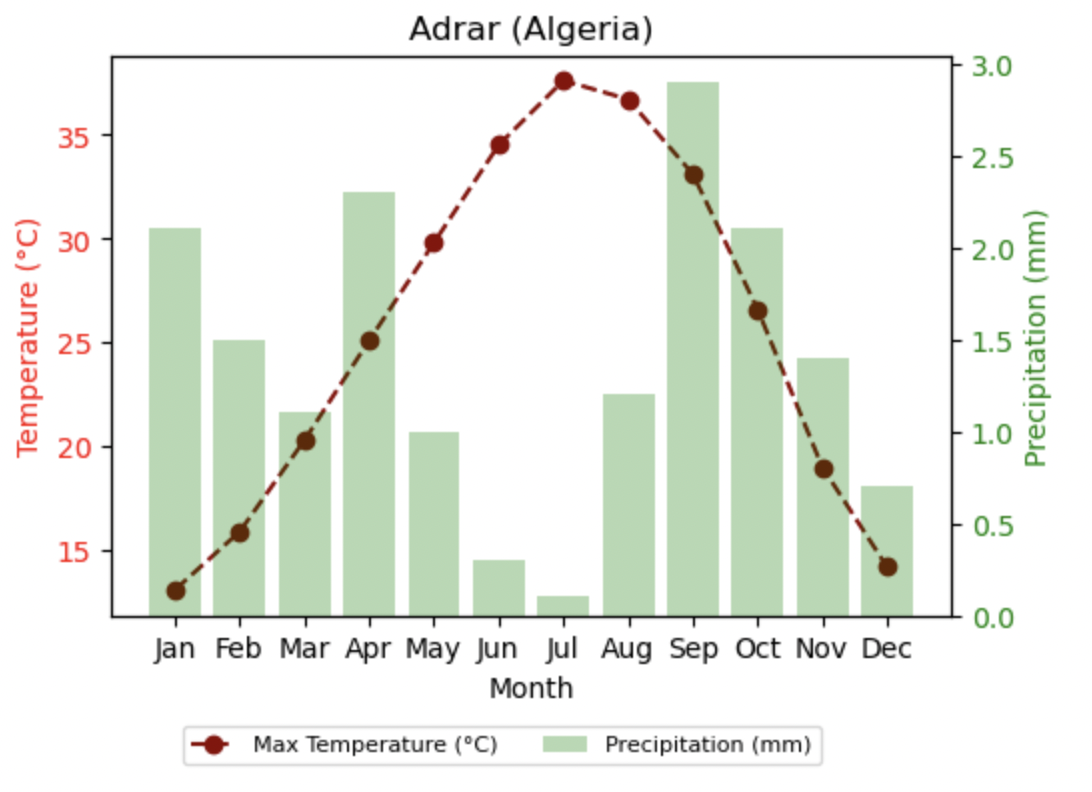

In [11]:
ds

latitude  longitude  altitude  \
region   country       place                                                   
Region-1 Algeria       Adrar                      27.86      -0.24    279.23   
                       AinSefra                   32.76      -0.65   1076.00   
                       AlgerDarElBeida            36.72       3.22     25.00   
                       Annaba                     36.85       7.82      3.00   
                       BBArreridj                 36.07       4.85    955.00   
...                                                 ...        ...       ...   
Region-6 UnitedKingdom Weybourne                  53.03       1.15     21.00   
                       WickAirport                58.47      -3.12     36.00   
                       WightStCatherinesPoint     50.62      -1.36     20.00   
                       Wittering                  52.67      -0.47     74.00   
                       Yeovilton                  51.04      -2.69     20.00   

                                              koppen  
region   country       place                          
Region-1 Algeria       Adrar                     BWh  
                       AinSefra                  BWk  
                       AlgerDarElBeida           Csa  
                       Annaba                    Csa  
                       BBArreridj                BSk  
...                                              ...  
Region-6 UnitedKingdom Weybourne                 Cfb  
                       WickAirport               Cfb  
                       WightStCatherinesPoint    Cfb  
                       Wittering                 Cfb  
                       Yeovilton                 Cfb  

[4463 rows x 4 columns]

In [10]:

ds = pd.read_csv('koppen.csv', index_col=[0,1,2])
#import matplotlib as mpl
#mpl.style.use('ggplot')
from koppen_class import plot_hythergraph
for iff, f in enumerate(ifiles[:]):
    if np.mod(iff, 1) == 0:
        
        df = pd.read_csv(f, index_col=0)
        c0, c1, c2 = f.split('/')[1], f.split('/')[2], f.split('/')[-1][:-10]
        temp, precip = df['Temperature'].values, df['Precipitation'].values
        
        r = ds.loc[(c0, c1, c2)]
        lat, lon, kp = r['latitude'].values[0], r['longitude'].values[0], r['koppen'].values[0]
        tit = c2+' (' +c1+')\nLat: '+'%.2f'%lat+', Lon: %.2f'%lon + '\nClimate zone: '+kp
        
        fig = plot_hythergraph( temp, precip, tit)
        #plt.grid(False)
        odir = 'fig/'+c0+'/'+c1+'/'
        
        if not os.path.exists(odir): os.makedirs(odir)
        ofile = odir + c2+'.png'
        plt.savefig(ofile, dpi = 150)        
        plt.close()
        

# Calculate Koppen and plot


In [213]:
koppenDict = {
    "Af": 1,
    "Am": 2,
    "Aw": 3,
    "BWh": 4, 
    "BWk": 5, "BSh": 6, "BSk": 7,
    "Csa": 8, "Csb": 9, "Csc": 10, "Cwa": 11, "Cwb": 12, "Cwc": 13, "Cfa": 14, "Cfb": 15, "Cfc": 16,
    "Dsa": 17, "Dsb": 18, "Dsc": 19, "Dsd": 20, "Dwa": 21, "Dwb": 22, "Dwc": 23, "Dwd": 24, "Dfa": 25, "Dfb": 26,
    "Dfc": 27, "Dfd": 28,
    "ET": 29, "EF": 30
}

diction = {"Af": (150, 0, 0, 255),
           "Am": (255, 0, 0, 255),
           "Aw": (255, 204, 204, 255),
           "BWh":(255, 204, 0, 255),
           "BWk":(255, 255, 100, 255),
           "BSh":(204, 141, 20, 255),
           "BSk":(204, 170, 84, 255),
           "Csa":(0, 255, 0, 255),
           "Csb":(150, 255, 0, 255),
           "Csc":(200, 255, 0, 255),
           "Cwa":(180, 100, 0, 255),
           "Cwb":(150, 100, 0, 255),
           "Cwc":(90, 60, 0, 255),
           "Cfa":(0, 50, 0, 255),
           "Cfb":(0, 80, 0, 255),
           "Cfc":(0, 120, 0, 255),
           "Dsa":(255, 110, 255, 255),
           "Dsb":(255, 180, 255, 255),
           "Dsc":(230, 200, 255, 255),
           "Dsd":(200, 200, 200, 255),
           "Dwa":(200, 180, 255, 255),
           "Dwb":(154, 127, 179, 255),
           "Dwc":(135, 89, 179, 255),
           "Dwd":(111, 36, 179, 255),
           "Dfa":(50, 0, 50, 255),
           "Dfb":(100, 0, 100, 255),
           "Dfc":(200, 0, 200, 255),
           "Dfd":(200, 20, 133, 255),
           "ET": (100, 255, 255, 255),
           "EF": (100, 150, 255, 255)
           }

In [20]:
import cartopy.crs as ccrs

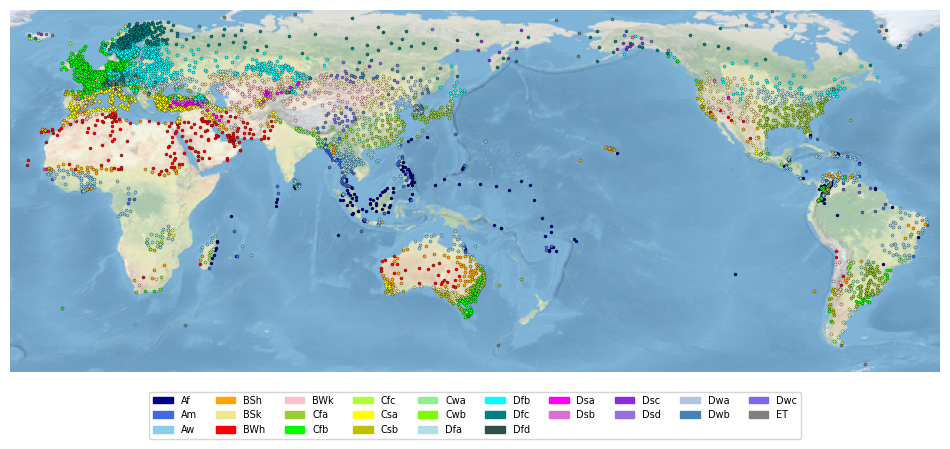

In [29]:
kp = pd.read_excel('Koppen_class_list.xlsx', index_col=1)
if 1:
    import matplotlib.patches as patches
    ds = pd.read_csv('koppen.csv', index_col=[0,1,2])
    

    proj = ccrs.PlateCarree(central_longitude=150)

    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection= proj )
    
    ax.set_extent([-90, 300, -65, 75], crs=ccrs.PlateCarree())
    
    ax.stock_img()
    koppl = list(ds.groupby('koppen'))
    
    legend_handles = []
    for ig, g in enumerate( koppl[:] ):
        dl = g[1] 
        lat, lon = dl['latitude'].values, dl['longitude'].values
        lon = np.where(lon<0, lon+360, lon)
        #col = np.array(diction[g[0]])/255.
        col = kp.loc[g[0], 'Color']
        ax.scatter(lon, lat, s = 5, 
                   color = col,
                   edgecolor = 'k',
                   lw = .2,
                   transform=ccrs.Geodetic())
        legend_handles.append(patches.Patch(color=col, label=g[0]) )
    
    plt.axis('off')
    
    plt.legend(handles=legend_handles, bbox_to_anchor=(0.5, -.2),
               loc='lower center', fontsize=7, ncols=10)
    plt.savefig('fig/koppen_world.png', dpi = 150)

# Climograph
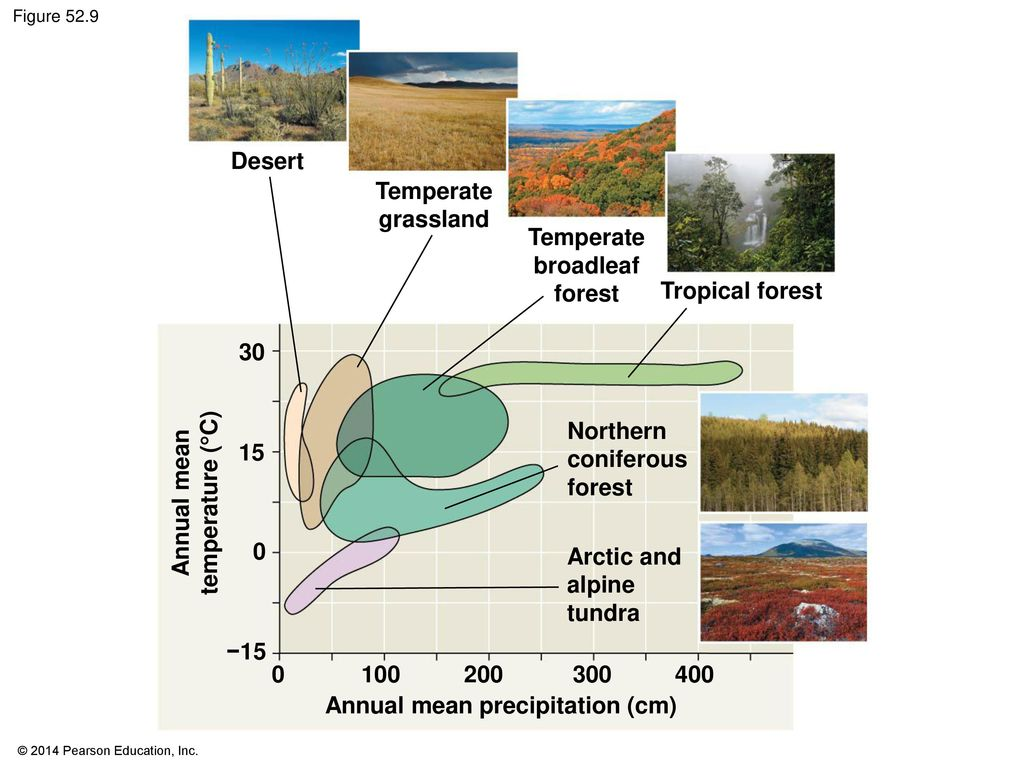
(https://public.wsu.edu/~rlee/biol103/ecologybiosphere/index.htm)


In [272]:
def scatter_base():
    fig = plt.figure(figsize=[5,5])
    ax = plt.axes([.1,.1,.8,.8])
    ax.set_ylim(-20,40)
    ax.set_xlim(0,600)
    plt.xlabel('Precipitation (mm)')
    plt.ylabel('Tempetature (degC)')
    ax.grid()
    return fig, ax

IndexError: list index out of range

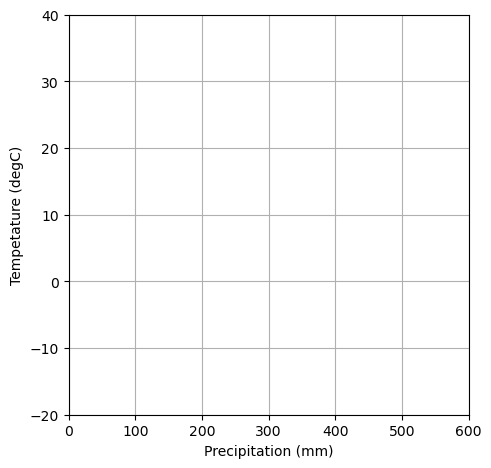

In [324]:

colors = np.arange(12)
fig, ax = scatter_base()

ist = 1000
precip, temp = pr[ist], ts[ist]
x, y = precip, temp

if (x < 0).any(): sys.exit()
if (y < -60).any(): sys.exit()

x = np.append(x,x[:1])
y = np.append(y,y[:1])
#ax.scatter(x, y, c=colors, cmap='hsv', alpha=0.7)
ax.plot(x, y, color='gray', linestyle='-', alpha=0.7, lw =1)
#labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
labels = list(range(1,13))+[1]
for i in range(len(x)):
    plt.text(x[i], y[i] + 0.03, labels[i], ha='center')
    

IndexError: list index out of range

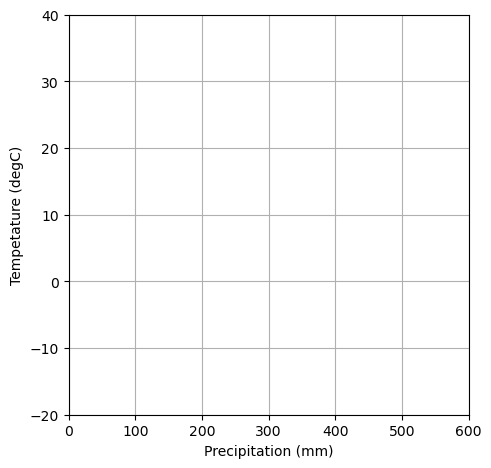

In [323]:

colors = np.arange(13)
fig, ax = scatter_base()

ist = 1000
precip, temp = pr[ist], ts[ist]
x, y = precip, temp

if (x < 0).any(): sys.exit()
if (y < -60).any(): sys.exit()

x = np.append(x,x[:1])
y = np.append(y,y[:1])
ax.scatter(x, y, c=colors, cmap='hsv', alpha=0.7)
ax.plot(x, y, color='gray', linestyle='-', alpha=0.7, lw =1)
#labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
labels = list(range(1,13))+[1]
for i in range(len(x)):
    plt.text(x[i], y[i] + 1, labels[i], ha='center')


In [319]:
y

array([-2.1,  0.3,  5.6, 12. , 17.6, 22.2, 25.3, 26. , 21.4, 14.5,  7.2,
        0.1, -2.1])